In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage,AnnotationBbox,TextArea
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cv2
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
while os.getcwd().split('\\')[-1] != 'ecological-networks':
    %cd ..
import setup_paths
setup_paths.add_path()
from Species_Reintroductions import *
DATA_TYPE = 'Real_1D'
CASE_TO_SOLVE_init(DATA_TYPE)
get_CASE()

d:\Github\ecological-networks\Code\01_Species_Reintroductions
d:\Github\ecological-networks\Code
d:\Github\ecological-networks
Real_1D


In [ ]:
# os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', 'ScatterData', f"{loc}", f"{NetworkName}.pkl")
# os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', f"Scatter_{loc}_Consolidated.pkl")

In [2]:
Data = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', "Scatter_01_Consolidated.pkl"))

In [3]:
type(Data)

list

In [4]:
Data[0]

n              m              L              S  \
count  325295.000000  325295.000000  325295.000000  325295.000000   
mean       29.151321      59.917318     157.177534      89.068639   
std        19.287306      26.772973      81.748069      33.083068   
min         1.000000       1.000000       1.000000       2.000000   
25%        17.000000      41.000000      97.000000      65.000000   
50%        24.000000      53.000000     143.000000      86.000000   
75%        34.000000      75.000000     193.000000     107.000000   
max       105.000000     139.000000     456.000000     180.000000   

                   A              C              N      Abundance  \
count  325295.000000  325295.000000  325291.000000  325295.000000   
mean        2.790701       0.113647       0.235843       6.919609   
std         1.952268       0.054229       0.075993       2.980074   
min         0.133333       0.034528       0.000000       0.115774   
25%         1.523810       0.081349       0.179832       6.258124   
50%         2.428571       0.101307       0.230610       7.365656   
75%         3.516129       0.132576       0.278595       8.639661   
max        36.500000       1.000000       1.000000      14.677098   

        Ob Abundance  Settling Time    Persistence  
count  325295.000000  325295.000000  325295.000000  
mean        6.915241      50.022460       0.681021  
std         2.982962      31.052826       0.218726  
min         0.000000      15.000000       0.000000  
25%         6.254076      32.000000       0.548387  
50%         7.362545      43.000000       0.731707  
75%         8.638275      60.000000       0.857143  
max        14.677098     299.000000       1.000000

In [5]:
Data[1]

n         m         L         S         A         C  \
n              1.000000  0.005516  0.272698  0.587461 -0.569273 -0.669505   
m              0.005516  1.000000  0.830211  0.812481  0.471636 -0.153261   
L              0.272698  0.830211  1.000000  0.830843  0.137230 -0.176418   
S              0.587461  0.812481  0.830843  1.000000  0.049795 -0.514348   
A             -0.569273  0.471636  0.137230  0.049795  1.000000  0.606767   
C             -0.669505 -0.153261 -0.176418 -0.514348  0.606767  1.000000   
N             -0.037400 -0.065472  0.088921 -0.074789  0.207573  0.445134   
Abundance      0.014540  0.635743  0.705221  0.522962  0.342407  0.102418   
Ob Abundance   0.015101  0.635841  0.705535  0.523368  0.342004  0.101992   
Settling Time  0.162168 -0.434283 -0.442674 -0.256906 -0.319342 -0.214710   
Persistence    0.457359  0.266480  0.464883  0.482292 -0.379929 -0.512060   

                      N  Abundance  Ob Abundance  Settling Time  Persistence  
n             -0.037400   0.014540      0.015101       0.162168     0.457359  
m             -0.065472   0.635743      0.635841      -0.434283     0.266480  
L              0.088921   0.705221      0.705535      -0.442674     0.464883  
S             -0.074789   0.522962      0.523368      -0.256906     0.482292  
A              0.207573   0.342407      0.342004      -0.319342    -0.379929  
C              0.445134   0.102418      0.101992      -0.214710    -0.512060  
N              1.000000   0.363205      0.363381      -0.239351    -0.130868  
Abundance      0.363205   1.000000      0.999997      -0.458830     0.201302  
Ob Abundance   0.363381   0.999997      1.000000      -0.458571     0.202248  
Settling Time -0.239351  -0.458830     -0.458571       1.000000    -0.014012  
Persistence   -0.130868   0.201302      0.202248      -0.014012     1.000000

In [6]:
Data[2]

n         m         L         S         A         C  \
n              1.000000  0.099446  0.346251  0.456009 -0.524765 -0.677734   
m              0.099446  1.000000  0.655777  0.656120  0.386607 -0.100692   
L              0.346251  0.655777  1.000000  0.742329  0.102742 -0.193122   
S              0.456009  0.656120  0.742329  1.000000  0.032471 -0.398381   
A             -0.524765  0.386607  0.102742  0.032471  1.000000  0.430109   
C             -0.677734 -0.100692 -0.193122 -0.398381  0.430109  1.000000   
N             -0.108788 -0.014079  0.062682 -0.028367  0.090578  0.277899   
Abundance     -0.053960  0.548462  0.565415  0.357394  0.423229  0.211358   
Ob Abundance  -0.052445  0.546280  0.565366  0.356993  0.420848  0.210929   
Settling Time  0.146153 -0.467323 -0.434639 -0.253685 -0.445119 -0.279075   
Persistence    0.430483  0.177907  0.327803  0.320088 -0.214536 -0.316329   

                      N  Abundance  Ob Abundance  Settling Time  Persistence  
n             -0.108788  -0.053960     -0.052445       0.146153     0.430483  
m             -0.014079   0.548462      0.546280      -0.467323     0.177907  
L              0.062682   0.565415      0.565366      -0.434639     0.327803  
S             -0.028367   0.357394      0.356993      -0.253685     0.320088  
A              0.090578   0.423229      0.420848      -0.445119    -0.214536  
C              0.277899   0.211358      0.210929      -0.279075    -0.316329  
N              1.000000   0.192471      0.192867      -0.224637    -0.073462  
Abundance      0.192471   1.000000      0.995362      -0.657931     0.083020  
Ob Abundance   0.192867   0.995362      1.000000      -0.660196     0.084501  
Settling Time -0.224637  -0.657931     -0.660196       1.000000    -0.025702  
Persistence   -0.073462   0.083020      0.084501      -0.025702     1.000000

In [7]:
Data[3]

n         m         L         S         A         C  \
n              1.000000  0.132956  0.490800  0.620183 -0.687841 -0.845414   
m              0.132956  1.000000  0.836484  0.807292  0.564243 -0.137894   
L              0.490800  0.836484  1.000000  0.905363  0.189082 -0.271845   
S              0.620183  0.807292  0.905363  1.000000  0.059560 -0.555398   
A             -0.687841  0.564243  0.189082  0.059560  1.000000  0.587318   
C             -0.845414 -0.137894 -0.271845 -0.555398  0.587318  1.000000   
N             -0.153743 -0.006368  0.101400 -0.031142  0.130016  0.386778   
Abundance     -0.053422  0.754167  0.748761  0.500791  0.587229  0.287780   
Ob Abundance  -0.051224  0.752933  0.748984  0.500953  0.584231  0.287171   
Settling Time  0.204043 -0.679743 -0.617836 -0.371248 -0.630307 -0.400073   
Persistence    0.584401  0.258490  0.469818  0.457607 -0.310065 -0.447385   

                      N  Abundance  Ob Abundance  Settling Time  Persistence  
n             -0.153743  -0.053422     -0.051224       0.204043     0.584401  
m             -0.006368   0.754167      0.752933      -0.679743     0.258490  
L              0.101400   0.748761      0.748984      -0.617836     0.469818  
S             -0.031142   0.500791      0.500953      -0.371248     0.457607  
A              0.130016   0.587229      0.584231      -0.630307    -0.310065  
C              0.386778   0.287780      0.287171      -0.400073    -0.447385  
N              1.000000   0.276563      0.276782      -0.329169    -0.109463  
Abundance      0.276563   1.000000      0.999805      -0.837010     0.123683  
Ob Abundance   0.276782   0.999805      1.000000      -0.837900     0.125735  
Settling Time -0.329169  -0.837010     -0.837900       1.000000    -0.038033  
Persistence   -0.109463   0.123683      0.125735      -0.038033     1.000000

In [8]:
DF = Data[4]
del Data

In [9]:
import sys
sys.getsizeof(DF)

28626112

In [11]:
print(DF.shape)
print(DF.columns)

(325295, 11)
Index(['n', 'm', 'L', 'S', 'A', 'C', 'N', 'Abundance', 'Ob Abundance',
       'Settling Time', 'Persistence'],
      dtype='object')


In [2]:
def get_ScatterPlot(SHOW_PLOT = True, set_dpi = 100):
    FileName = os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', f"Scatter_01_Consolidated.pkl")
    D01 = UnpickleObj(FileName)[4]
    D01.drop(D01[ D01['N'] == 0 ].index ,inplace = True)
    D01.dropna(axis = 0, inplace = True)
    D01 = D01[D01['Abundance'] > 1.0]
    D01.reset_index(drop = True, inplace = True)

    FileName = os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', f"Scatter_02_Consolidated.pkl")
    D02 = UnpickleObj(FileName)[4]
    D02.drop(D02[ D02['N'] == 0 ].index ,inplace = True)
    D02.dropna(axis = 0, inplace = True)
    D02 = D02[D02['Abundance'] > 1.0]
    D02.reset_index(drop = True, inplace = True)

    FileName = os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', f"Scatter_03_Consolidated.pkl")
    D03 = UnpickleObj(FileName)[4]
    D03.drop(D03[ D03['N'] == 0 ].index ,inplace = True)
    D03.dropna(axis = 0, inplace = True)
    D03 = D03[D03['Abundance'] > 0.3]
    D03.reset_index(drop = True, inplace = True)

    FileName = os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '03_Scatter_Data', f"Scatter_04_Consolidated.pkl")
    D04 = UnpickleObj(FileName)[4]
    D04.drop(D04[ D04['N'] == 0 ].index ,inplace = True)
    D04.dropna(axis = 0, inplace = True)
    D04 = D04[D04['Abundance'] > 0.3]
    D04.reset_index(drop = True, inplace = True)
    
    D_1D = pd.concat([D01,D02], ignore_index = True)
    D_2D = pd.concat([D04,D03], ignore_index = True)
    #del D01,D02,D03,D04
    
    D_lst = list([D_1D, D_2D])
    D_lst_Full = list([[D01,D02], [D04,D03]])
    V_lst = ['S','A','C','N']

    D1 = D_1D.copy()
    D2 = D_2D.copy()
    
    for Col_Name in list(D_1D.columns):
        
        X_scaled = preprocessing.MinMaxScaler().fit_transform(np.array(D1[Col_Name]).reshape(-1,1))
        D1[Col_Name] = X_scaled
        
        X_scaled = preprocessing.MinMaxScaler().fit_transform(np.array(D2[Col_Name]).reshape(-1,1))
        D2[Col_Name] = X_scaled
    # del Col_Name, X_scaled
    
    D_corr = [D1.corr(), D2.corr()]

    P_val = {}
    P_val['1D'] = {}
    P_val['2D'] = {}
    for i in list(D_1D.columns)[3:7]:
        for j in list(D_1D.columns)[-3:]:
            stat, p = stats.ttest_rel(D1[i],D1[j])
            P_val['1D'][i,j] = p
            # print(f"1D : [{i}, {j}] ;- {p}")
            stat, p = stats.ttest_ind(D2[i],D2[j], equal_var=False)
            P_val['2D'][i,j] = p
            # print(f"2D : [{i}, {j}] ;- {p}")

    Book = {}
    if SHOW_PLOT:
        for Vy in ['Ob Abundance', 'Settling Time', 'Persistence']:
            f, ax = plt.subplots(2,4, figsize = (30,15), dpi = set_dpi, sharey = 'row')
            f.tight_layout(pad = 0)
            for D_ind in range(len(D_lst)):
                
                D = D_lst[D_ind]
                D_Full = D_lst_Full[D_ind]

                D_copy = D.copy()
                for Col_Name in list(D.columns):
                    X_scaled = preprocessing.MinMaxScaler().fit_transform(np.array(D_copy[Col_Name]).reshape(-1,1))
                    #print(type(X_scaled))
                    
                    #X_scaled_Real = preprocessing.MinMaxScaler().fit_transform(np.array(D_Full[0][Col_Name]).reshape(-1,1))
                    #X_scaled_Real = X_scaled[:X_scaled_Real.shape[0]]
                    #X_scaled_Syn = preprocessing.MinMaxScaler().fit_transform(np.array(D_Full[1][Col_Name]).reshape(-1,1))
                    #X_scaled_Syn = X_scaled[X_scaled_Real.shape[0]:]

                    #print(len(X_scaled[:X_scaled_Real.shape[0]]), X_scaled_Real.shape[0], '\t\t', len(X_scaled[X_scaled_Real.shape[0]:]), X_scaled_Syn.shape[0])

                    D_copy[Col_Name] = X_scaled
                    #D_Full[0][Col_Name] = X_scaled[:X_scaled_Real.shape[0]]
                    #D_Full[1][Col_Name] = X_scaled[X_scaled_Real.shape[0]:]
                del X_scaled
                #del X_scaled_Real, X_scaled_Syn
                
                regr_all = LinearRegression().fit(D_copy[['S', 'A', 'C', 'N']],D_copy[Vy])
                r2_all = r2_score(D_copy[Vy], regr_all.predict(D_copy[['S', 'A', 'C', 'N']]))
                
                for V_ind in [0,1,2,3]:
                    V = V_lst[V_ind]
                    X_seq = np.array(D[V]).reshape(-1,1)
                    Y_seq = np.array(D[Vy]).reshape(-1,1)
                    
                    X_Real = np.array(D_Full[0][V]).reshape(-1,1)
                    Y_Real = np.array(D_Full[0][Vy]).reshape(-1,1)

                    X_Syn = np.array(D_Full[1][V]).reshape(-1,1)
                    Y_Syn = np.array(D_Full[1][Vy]).reshape(-1,1)

                    if (Vy == 'Ob Abundance') and (D_ind == 0):
                        Y_seq = (Y_seq - 0) / (14-0)
                        Y_Real = (Y_Real - 0) / (14-0)
                        Y_Syn = (Y_Syn - 0) / (14-0)
                    
                    
                    
                    if Vy in ['Abundance','Ob Abundance']:
                        #ax[D_ind,V_ind].scatter(X_seq,Y_seq, alpha = 0.05, color = 'black', marker = 1)
                        ax[D_ind,V_ind].scatter(X_Real,Y_Real, alpha = 0.05, color = 'lightskyblue', marker = 1)
                        ax[D_ind,V_ind].scatter(X_Syn,Y_Syn, alpha = 0.05, color = 'mediumspringgreen', marker = 1)
                    if Vy in ['Settling Time']:
                        #ax[D_ind,V_ind].scatter(X_seq,Y_seq, alpha = 0.10, color = 'black', marker = 2)
                        ax[D_ind,V_ind].scatter(X_Real,Y_Real, alpha = 0.10, color = 'lightskyblue', marker = 2)
                        ax[D_ind,V_ind].scatter(X_Syn,Y_Syn, alpha = 0.10, color = 'mediumspringgreen', marker = 2)
                    if Vy in ['Persistence']:
                        #ax[D_ind,V_ind].scatter(X_seq,Y_seq, alpha = 0.10, color = 'black', marker = 2)
                        ax[D_ind,V_ind].scatter(X_Real,Y_Real, alpha = 0.10, color = 'lightskyblue', marker = 2)
                        ax[D_ind,V_ind].scatter(X_Syn,Y_Syn, alpha = 0.10, color = 'mediumspringgreen', marker = 2)

                    regr_R = LinearRegression().fit(X_Real,Y_Real)
                    ax[D_ind,V_ind].plot(X_seq,regr_R.predict(X_seq), color="blue", linewidth = 5)
                    regr_S = LinearRegression().fit(X_Syn,Y_Syn)
                    ax[D_ind,V_ind].plot(X_seq,regr_S.predict(X_seq), color="green", linewidth = 5)

                    regr = LinearRegression().fit(X_seq,Y_seq)
                    ax[D_ind,V_ind].plot(X_seq,regr.predict(X_seq),color="red", linewidth = 5)
                    
                    r2 = r2_score(Y_seq, regr.predict(X_seq))
                    Book[(D_ind, Vy, V)] = r2
                    
                    ax[D_ind,V_ind].tick_params(labelsize = 40, rotation = 30)
                    ax[D_ind,V_ind].tick_params(axis='y', which='major', pad=5)
                    # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
                    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.15)
                    


                    if D_ind == 0:
                        if Vy == 'Abundance':ax[D_ind,V_ind].set_ylim([0,1.0])
                        if Vy == 'Ob Abundance':
                            ax[D_ind,V_ind].set_ylim([0,1.05])
                            #ax[D_ind,V_ind].set_yticks(np.arange(0.0,1.05,0.25))
                        if Vy == 'Settling Time':
                            ax[D_ind,V_ind].set_ylim([0,300])
                        if Vy == 'Persistence':
                            ax[D_ind,V_ind].set_ylim([0,1.0])
                        if V == "S":
                            if Vy in ['Abundance','Ob Abundance']:
                                ax[D_ind,V_ind].set_ylabel('1-D Model \n'+r"<$X$> $\longrightarrow$", fontsize = 45)
                                # ax[D_ind,V_ind].set_yticks(np.arange(14))
                                # ax[D_ind,V_ind].set_yticklabels(['0','','','','4','','','','8','','','','12',''])
                                f.text(-0.15, 0.5, r"Abundance $\longrightarrow$", va='center', ha='center',rotation = 'vertical', fontsize=66, style='italic')
                            if Vy in ['Settling Time']:
                                ax[D_ind,V_ind].set_ylabel('1-D Model \n'+r"<$ST$> $\longrightarrow$", fontsize = 45)
                                f.text(-0.15, 0.5, r"Settling TIme $\longrightarrow$", va='center', ha='center',rotation = 'vertical', fontsize=66, style='italic')
                            if Vy in ['Persistence']:
                                #ax[D_ind,V_ind].set_ylim([0,1.00])
                                ax[D_ind,V_ind].set_ylabel('1-D Model \n'+r"<$P$> $\longrightarrow$", fontsize = 45)
                                f.text(-0.15, 0.5, r"Persistence $\longrightarrow$", va='center', ha='center',rotation = 'vertical', fontsize=66, style='italic')
                            ax[D_ind,V_ind].set_ylabel(r"($R^2$ = " + str(round(r2_all,3)) + ')', fontsize = 40)
                            ax[D_ind,V_ind].yaxis.label.set_color('red')
                        elif V == "A":
                            ax[D_ind,V_ind].set_xlim([0,20])
                            #ax[D_ind,V_ind].set_yticks([])
                        elif V == "C":
                            ax[D_ind,V_ind].set_xlim([0,0.5])
                            #ax[D_ind,V_ind].set_yticks([])
                        #elif V == "N":
                            #ax[D_ind,V_ind].set_yticks([])
                        
                        ax[D_ind,V_ind].set_xticklabels([])
                        f.text(-0.075, 0.75, r"1-D Model", va='center', ha='center',rotation = 'vertical', fontsize=66, style='italic')
                        
                    if D_ind == 1:
                        if Vy == 'Abundance':ax[D_ind,V_ind].set_ylim([0,1.0])
                        if Vy == 'Ob Abundance':
                            ax[D_ind,V_ind].set_ylim([0,1.05])
                            #ax[D_ind,V_ind].set_yticks(np.arange(0.0,1.05,0.25))
                        if Vy == 'Settling Time':
                            ax[D_ind,V_ind].set_ylim([75,175])
                        if Vy == 'Persistence':
                            ax[D_ind,V_ind].set_ylim([0,1.0])
                        if V == "S":
                            ax[D_ind,V_ind].set_xlabel('\n'+r"Network Size $\longrightarrow$", fontsize = 50)
                            if Vy in ['Abundance','Ob Abundance']:
                                ax[D_ind,V_ind].set_ylabel('2-D Model \n'+r"<$X$> $\longrightarrow$", fontsize = 45)
                            if Vy in ['Settling Time']:
                                ax[D_ind,V_ind].set_ylabel('2-D Model \n'+r"<$ST$> $\longrightarrow$", fontsize = 45)
                            if Vy in ['Persistence']:
                                #ax[D_ind,V_ind].set_ylim([0,1.05])
                                ax[D_ind,V_ind].set_ylabel('2-D Model \n'+r"<$P$> $\longrightarrow$", fontsize = 45)
                            ax[D_ind,V_ind].set_ylabel(r"($R^2$ = " + str(round(r2_all,3)) + ')', fontsize = 40)
                            ax[D_ind,V_ind].yaxis.label.set_color('red')
                            ax[D_ind,V_ind].set_xticks([0,50,100,150,200])
                            
                        elif V == "A":
                            ax[D_ind,V_ind].set_xlabel('\n'+r"Asymmetry $\longrightarrow$", fontsize = 50)
                            #ax[D_ind,V_ind].set_yticks([])
                            ax[D_ind,V_ind].set_xlim([0,20])
                        elif V == "C":
                            ax[D_ind,V_ind].set_xlabel('\n'+r"Connectance $\longrightarrow$", fontsize = 50)
                            #ax[D_ind,V_ind].set_yticks([])
                            ax[D_ind,V_ind].set_xlim([0,0.5])
                        elif V == "N":
                            ax[D_ind,V_ind].set_xlabel('\n'+r"Nestedness $\longrightarrow$", fontsize = 50)
                            #ax[D_ind,V_ind].set_yticks([])
                            ax[D_ind,V_ind].set_xlim([0,0.6])
                        f.text(-0.075, 0.25, r"2-D Model", va='center', ha='center',rotation = 'vertical', fontsize=66, style='italic')
                    ax[D_ind,V_ind].text(0.55,0.05, r'$coef = $' + str(round(regr_all.coef_[V_ind],3)) + '\n' + r'$corr = $' + str(round(D_corr[D_ind].loc[V,Vy],3)), 
                                         transform=ax[D_ind,V_ind].transAxes, 
                                         fontsize = 30, 
                                         color = 'red',
                                         va='bottom', ha='left', 
                                         bbox = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
                                         )
                    legend_elements = [
                        Line2D([0], [0], marker='o', color='w', label='Real Networks', markerfacecolor='lightskyblue', markersize=50),
                        Line2D([0], [0], marker='o', color='w', label='Synthetic Networks', markerfacecolor='mediumspringgreen', markersize=50),
                        ]
                    l1 = ax[-1,0].legend(handles=legend_elements, bbox_to_anchor = [1.0,-0.5], loc = 'upper left', title = '', fontsize = 44, frameon = False, ncol = 2)

                    l1.get_texts()[0].set_color('blue')
                    l1.get_texts()[1].set_color('green')

        # del D_lst, V_lst, Vy, f, ax, D_ind, V_ind, X_seq, Y_seq, regr, V, D
    return None
    #return D1, D2, P_val, Book

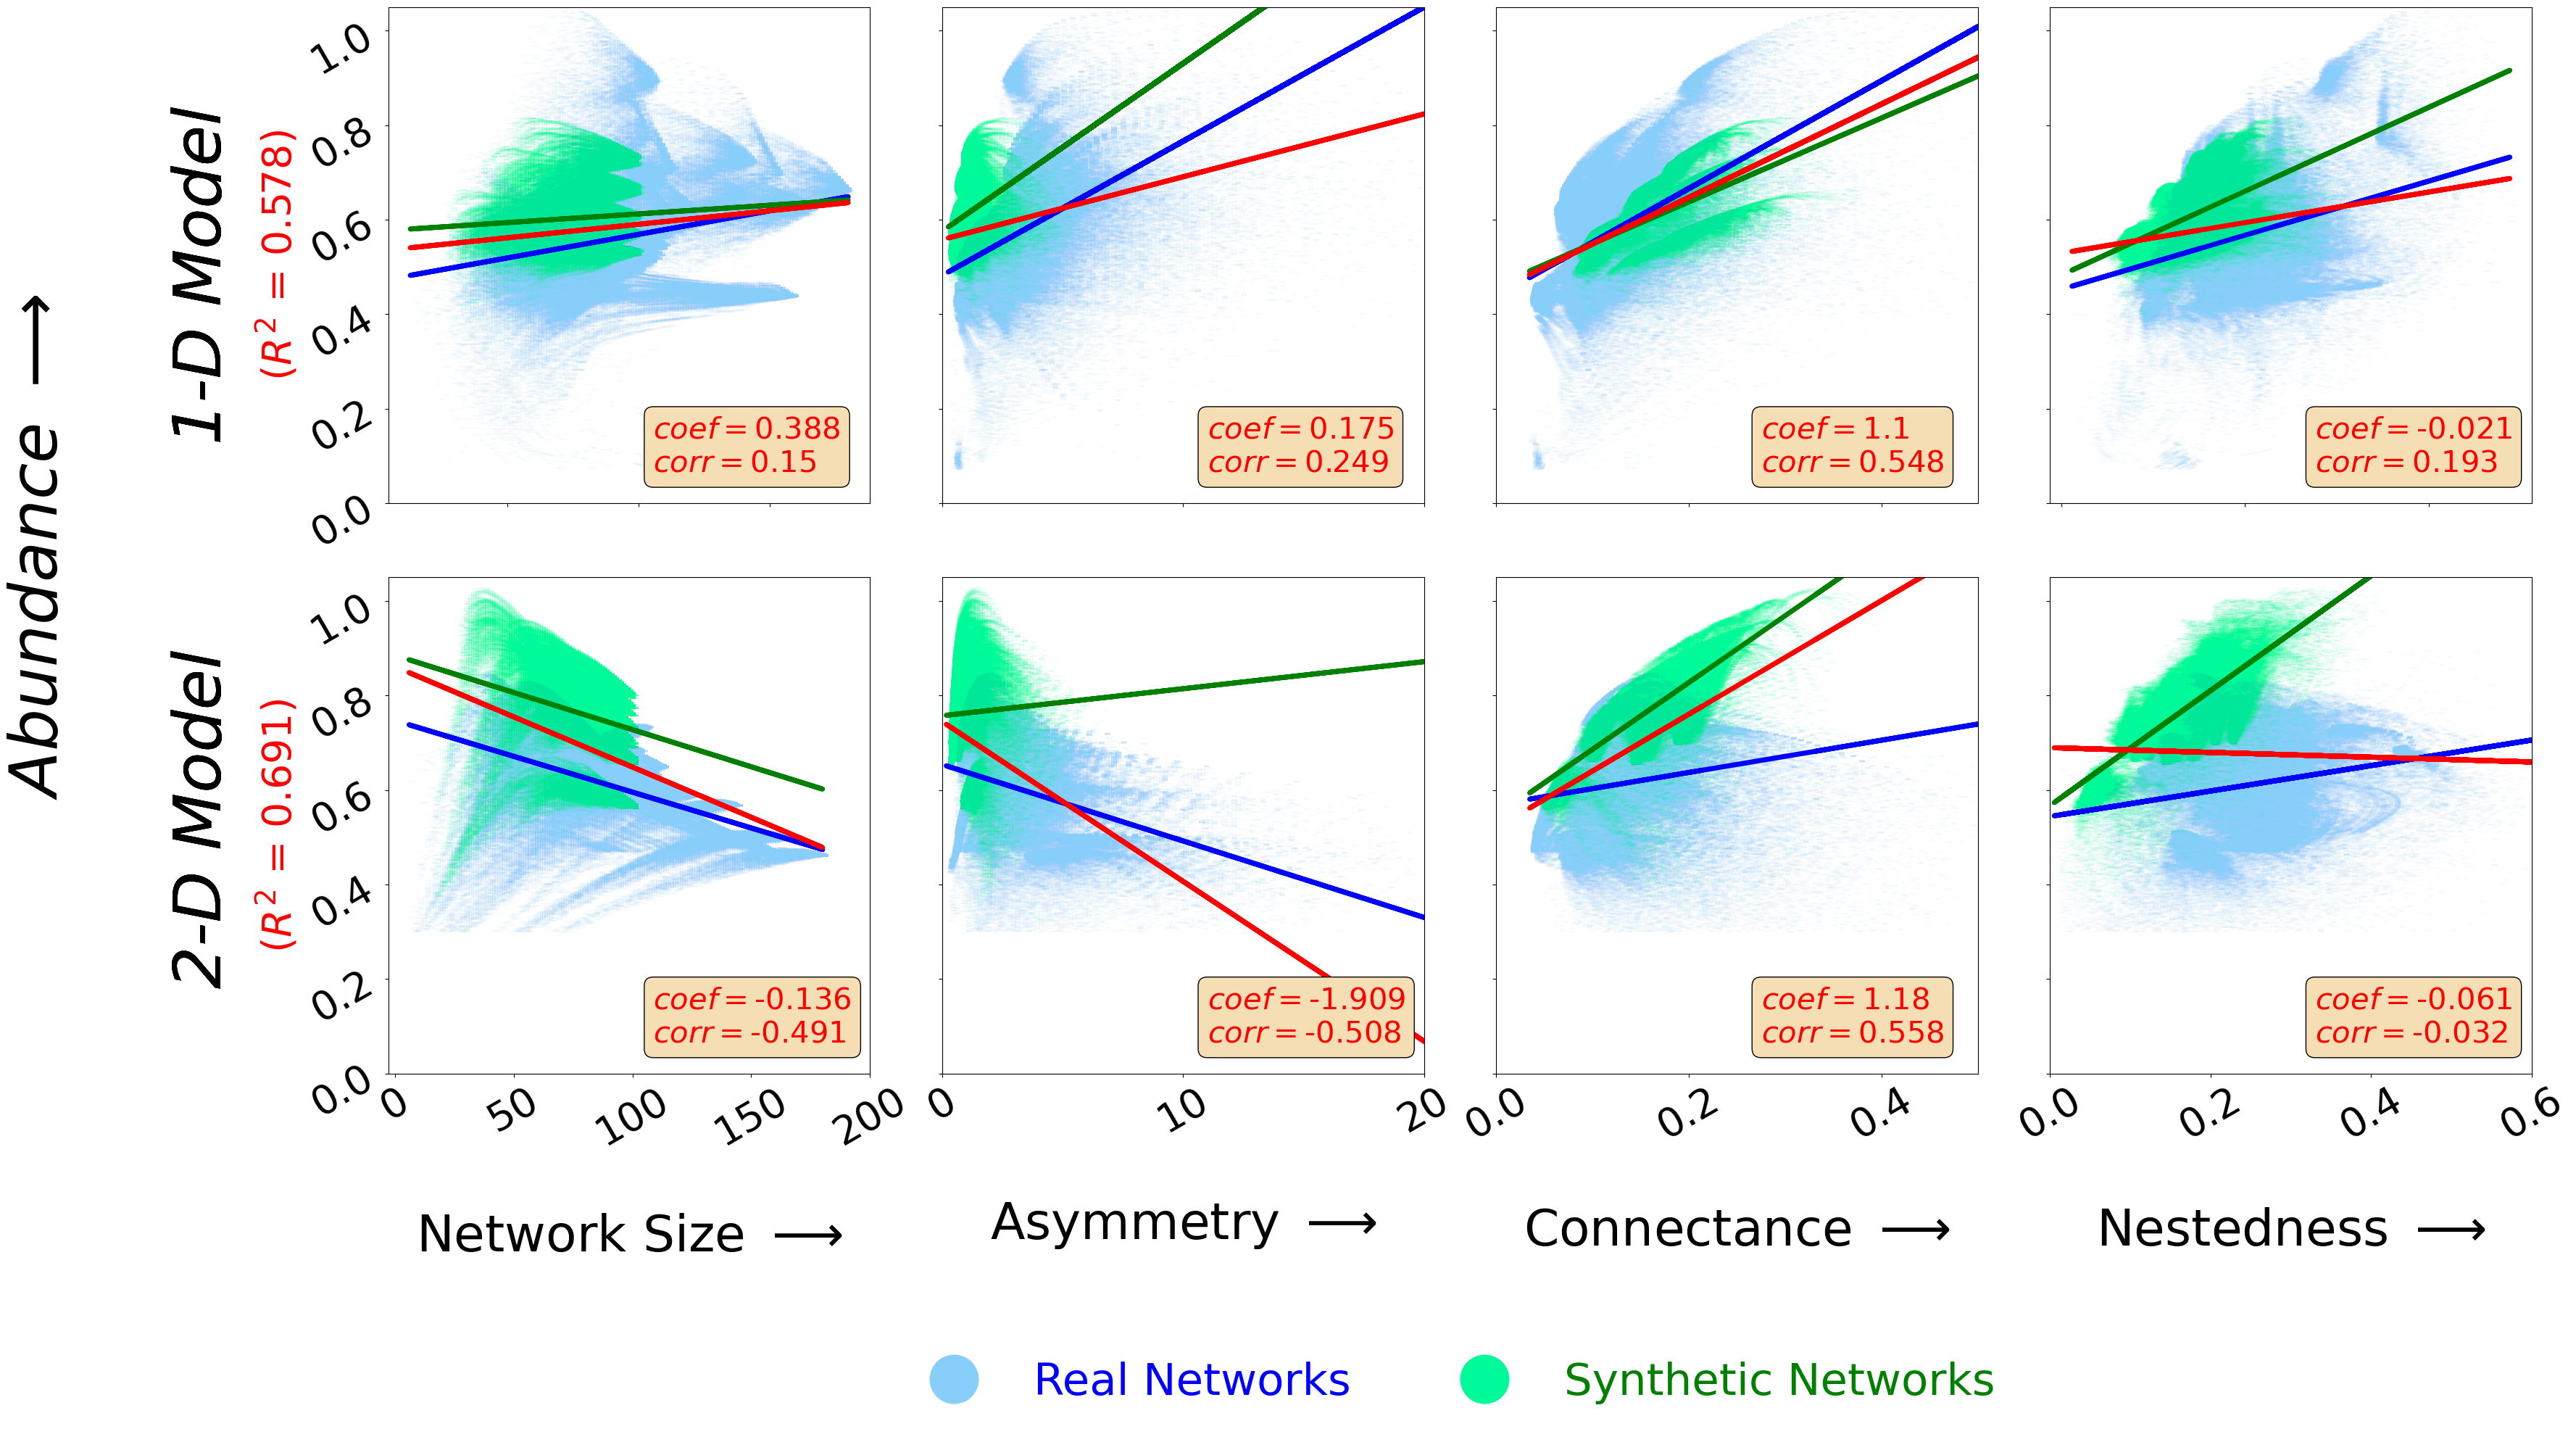

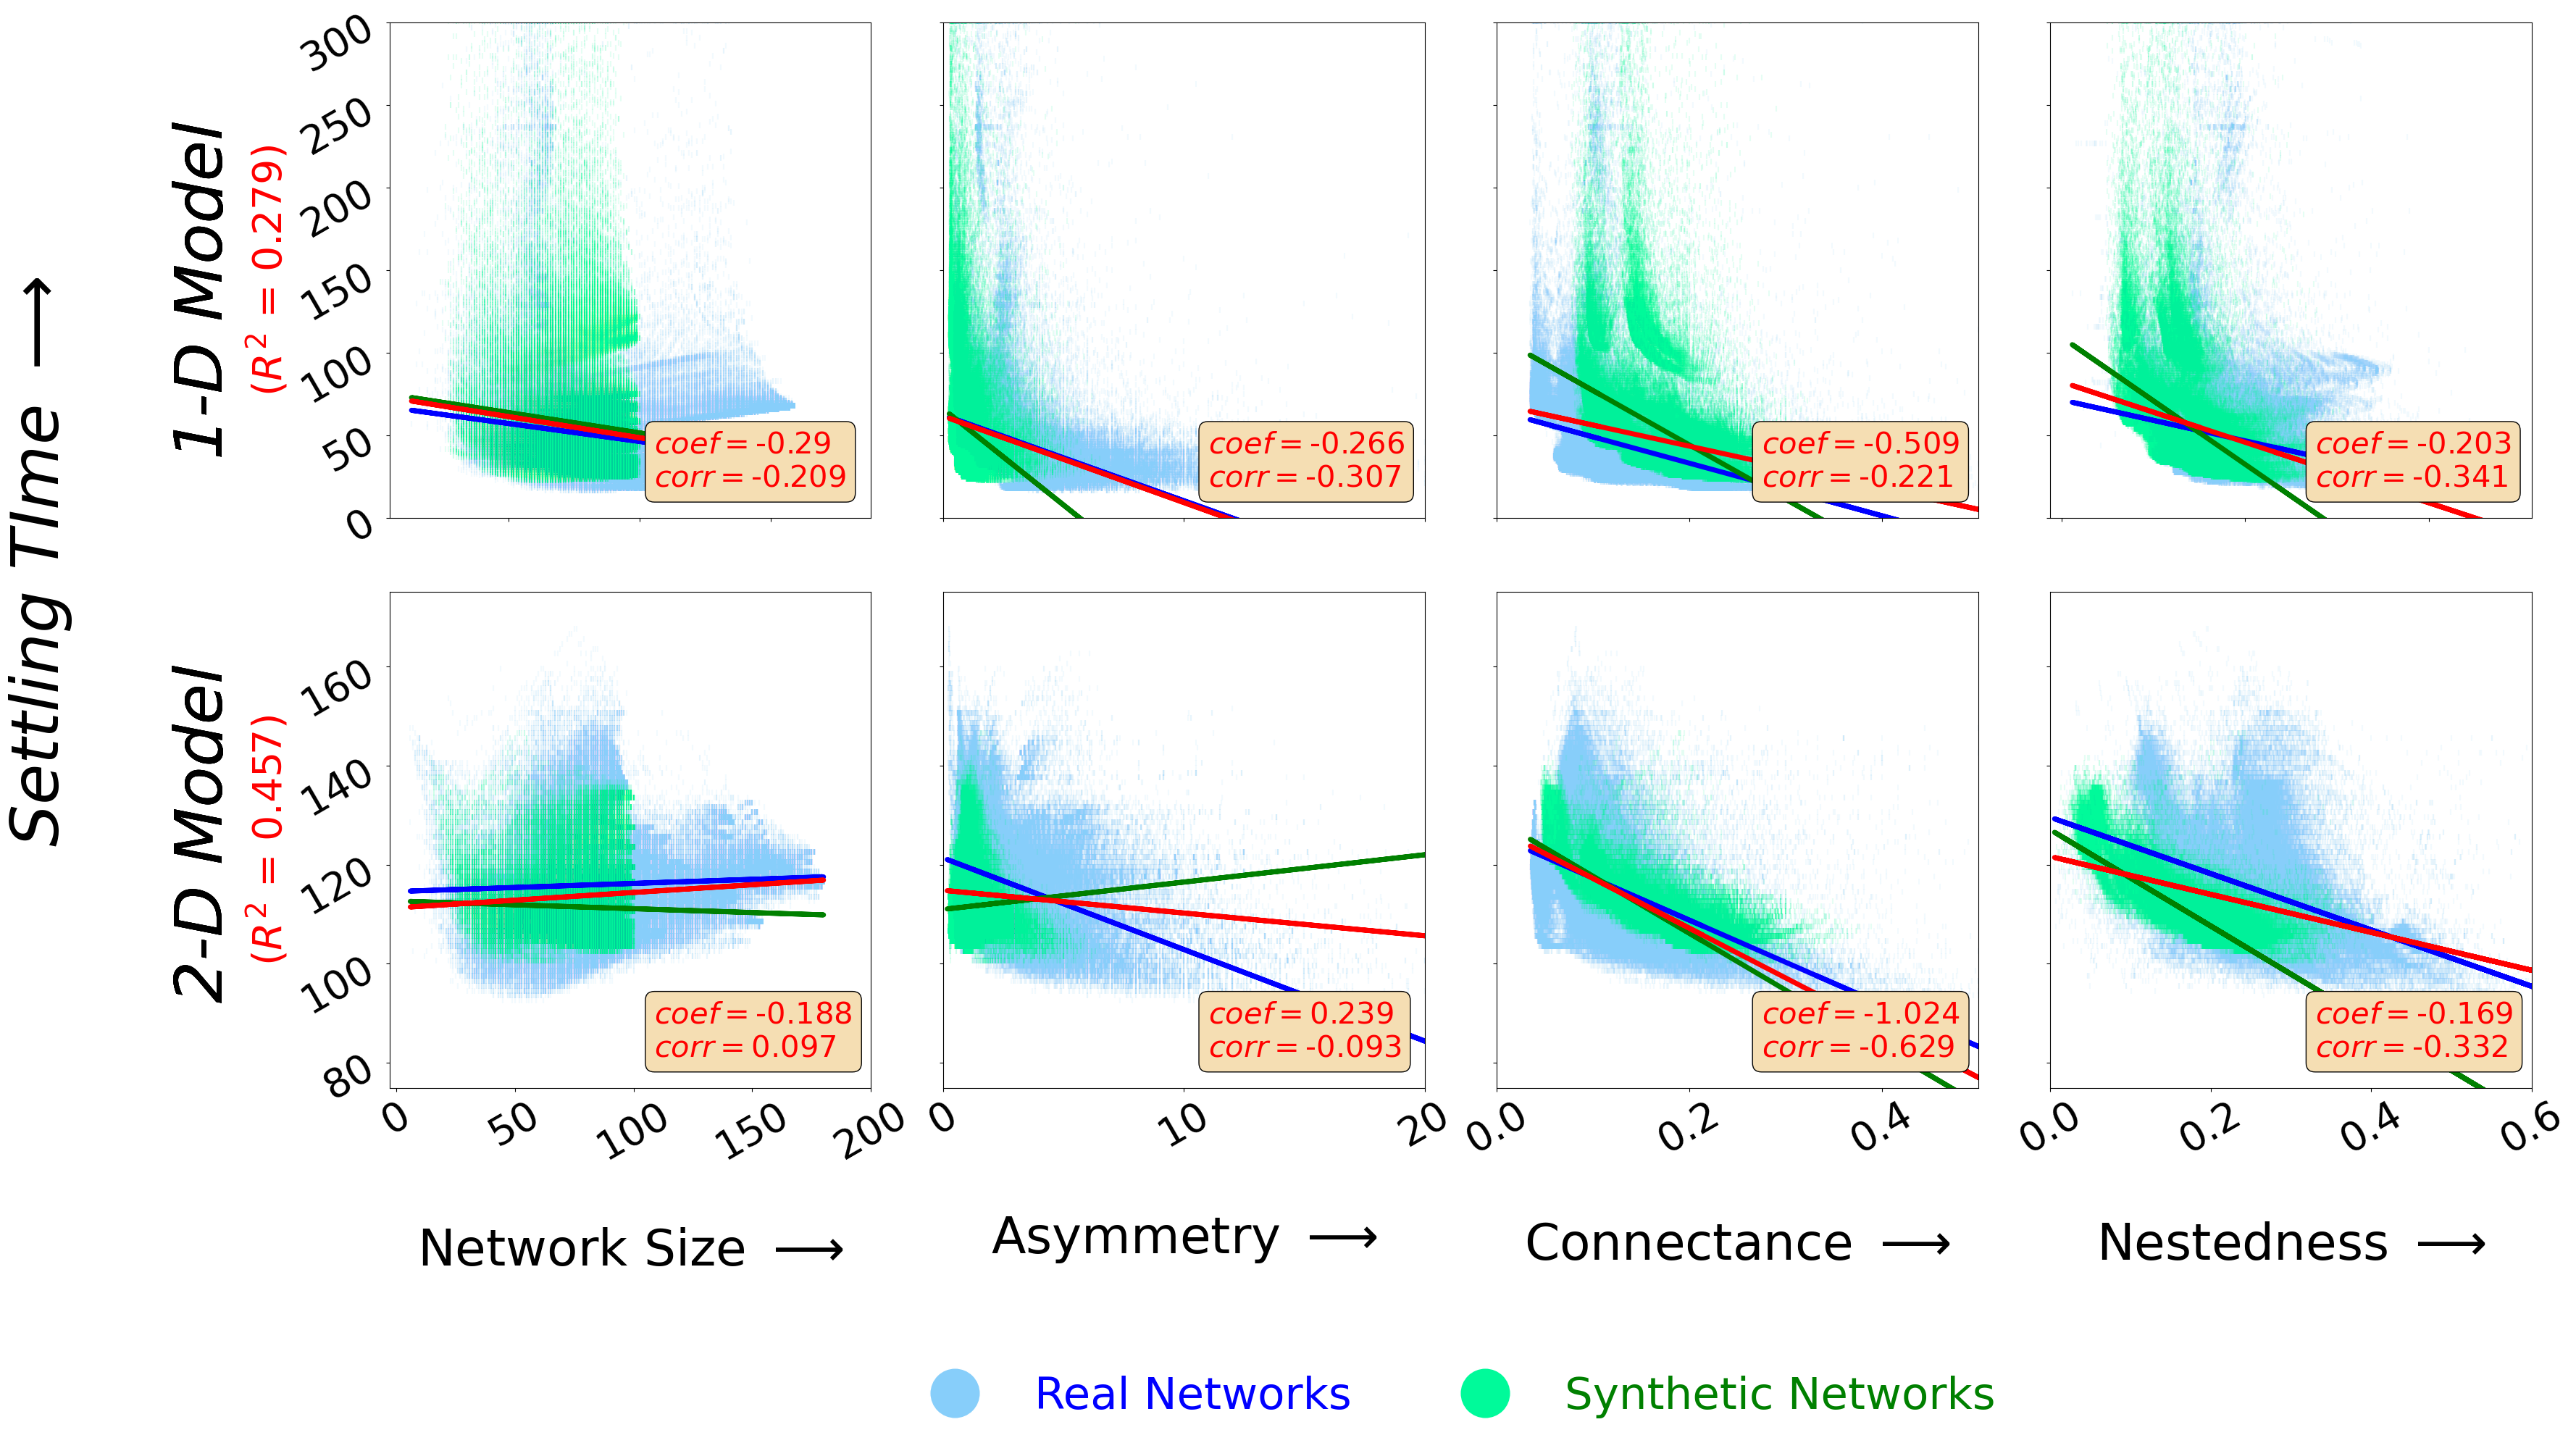

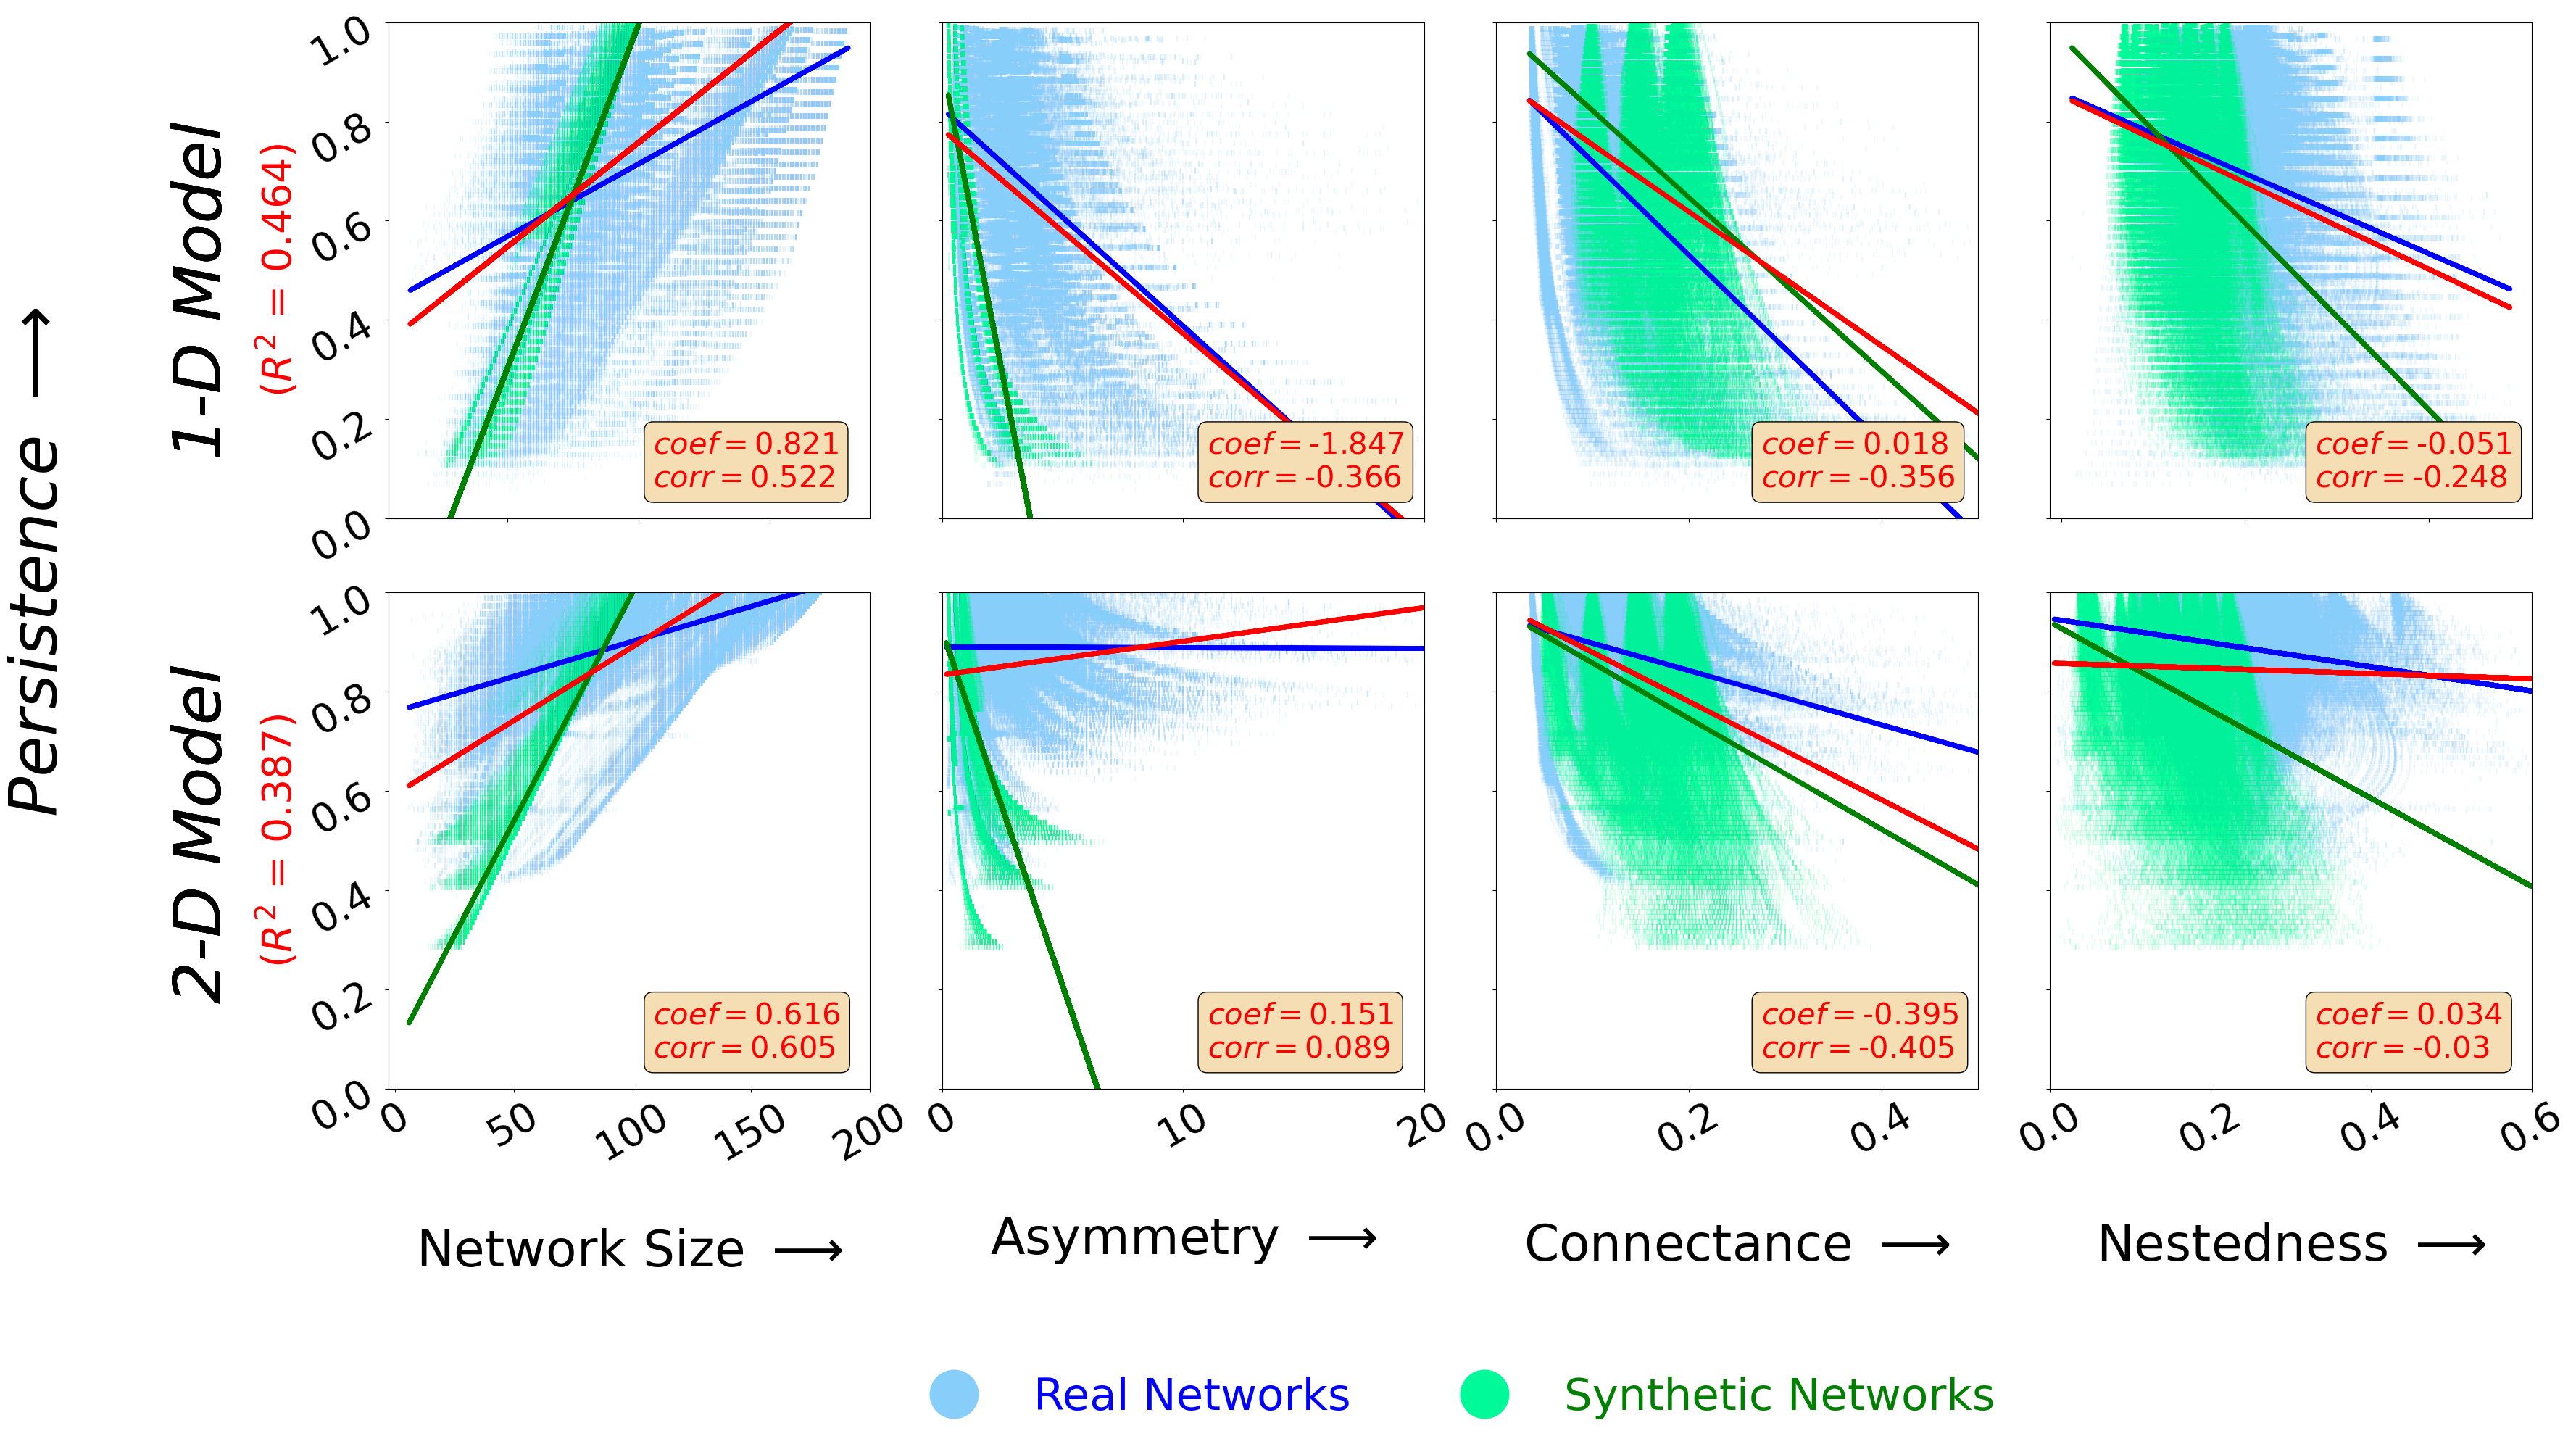

In [3]:
get_ScatterPlot(SHOW_PLOT = True, set_dpi = 100);